<a href="https://colab.research.google.com/github/AnVo01/AI/blob/AI/Face_Detect_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers import Dense,Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab import drive
drive.mount('/content/gdrive')

train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

train_data = train.flow_from_directory('/content/gdrive/MyDrive/AI/Face_image/Trainning',
                                       target_size = (150,150),
                                       batch_size = 10,
                                       class_mode = 'categorical')
validation_dataset = train.flow_from_directory('/content/gdrive/MyDrive/AI/Face_image/Validation',
                                       target_size = (150,150),
                                       batch_size = 10,
                                       class_mode = 'categorical')

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
Dropout(0.5)
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=5,batch_size=10,validation_data=validation_dataset,verbose=1)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 256 images belonging to 4 classes.
Found 50 images belonging to 4 classes.
Epoch 1/5
26/26 [==============================] - 11s 410ms/step - loss: 3.1791 - accuracy: 0.6797 - val_loss: 0.2413 - val_accuracy: 0.9600
Epoch 2/5
26/26 [==============================] - 10s 392ms/step - loss: 0.0542 - accuracy: 0.9844 - val_loss: 0.1251 - val_accuracy: 0.9200
Epoch 3/5
26/26 [==============================] - 10s 396ms/step - loss: 0.0867 - accuracy: 0.9688 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 4/5
26/26 [==============================] - 10s 399ms/step - loss: 0.0224 - accuracy: 0.9961 - val_loss: 0.4709 - val_accuracy: 0.8800
Epoch 5/5
26/26 [==============================] - 10s 402ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [ ]:
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.002069118432700634
độ chính xác kiểm tra là:  1.0


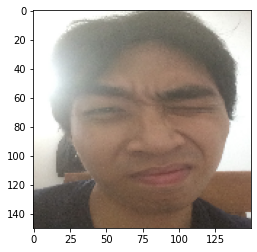

H.An


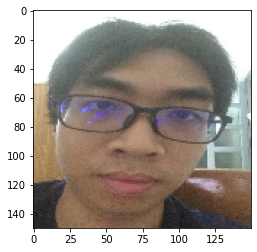

H.An


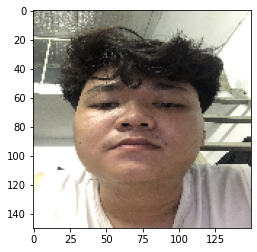

T.An


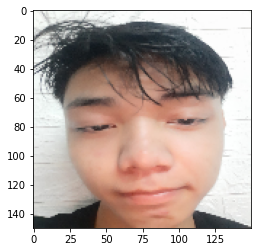

Phat


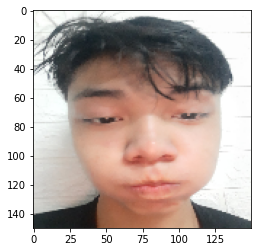

Phat


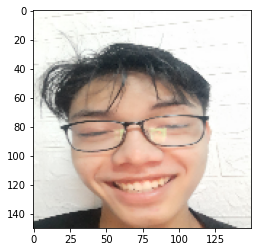

Phat


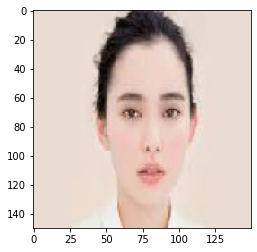

Other


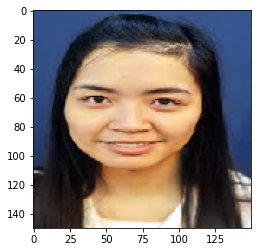

Other


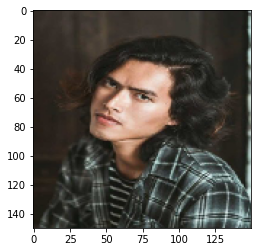

Other


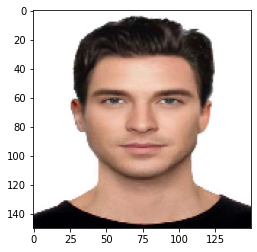

T.An


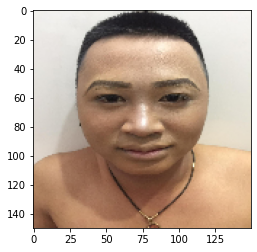

H.An


In [ ]:
import os
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
dir = '/content/gdrive/MyDrive/AI/Face_image/Testing'
for i in os.listdir(dir):
  img = load_img(dir +'//'+ i, target_size=(150,150))
  plt.imshow(img)
  plt.show()
  img = img_to_array(img)
  img = img.reshape(1,150,150,3)
  image = img/255.0
  pred = np.argmax(model.predict(image))
  if pred == 0:
    print("H.An")
  if pred == 2:
    print("Phat")
  if pred == 3:
    print("T.An")
  if pred == 1:
    print("Other")

In [ ]:
model.save('/content/gdrive/MyDrive/AI/Face_Detect_CNN.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/AI/Face_Detect_CNN.h5')

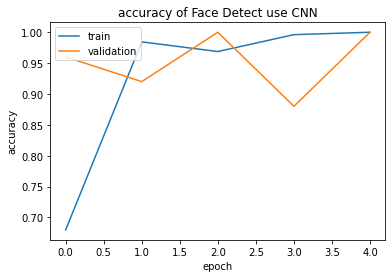

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of Face Detect use CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()